In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import pickle

In [26]:
df=pd.read_excel("DATA-TEMARA.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   temps                      4 non-null      object 
 1   T_Air_C_Avg                4 non-null      float64
 2   RH_Avg	                    4 non-null      float64
 3   V_Vent_m_s_Avg             4 non-null      float64
 4   Ray_Tot_KWh_m2_Tot cumulé  4 non-null      float64
 5   Perte_réflectance          4 non-null      float64
dtypes: float64(5), object(1)
memory usage: 320.0+ bytes


In [27]:
df.head(4)

,temps,T_Air_C_Avg,RH_Avg\t,V_Vent_m_s_Avg,Ray_Tot_KWh_m2_Tot cumulé,Perte_réflectance
0,T1,16.557253,81.155198,2.376314,791.690513,0.27
1,T2,19.803349,83.536651,1.813995,508.389976,0.54
2,T3,14.407118,78.435152,2.376743,483.220425,0.67
3,T4,17.306905,79.941144,2.539811,195.059701,0.17


In [31]:
df.columns = ["temps","T_Air_C_Avg", "RH_Avg","V_Vent_m_s_Avg", "Ray_Tot_KWh_m2_Tot cumulé", "Perte_réflectance"]
df.head()

,temps,T_Air_C_Avg,RH_Avg,V_Vent_m_s_Avg,Ray_Tot_KWh_m2_Tot cumulé,Perte_réflectance
0,T1,16.557253,81.155198,2.376314,791.690513,0.27
1,T2,19.803349,83.536651,1.813995,508.389976,0.54
2,T3,14.407118,78.435152,2.376743,483.220425,0.67
3,T4,17.306905,79.941144,2.539811,195.059701,0.17


In [32]:
df=df[["T_Air_C_Avg", "RH_Avg","V_Vent_m_s_Avg", "Ray_Tot_KWh_m2_Tot cumulé", "Perte_réflectance"]]
df.head()

,T_Air_C_Avg,RH_Avg,V_Vent_m_s_Avg,Ray_Tot_KWh_m2_Tot cumulé,Perte_réflectance
0,16.557253,81.155198,2.376314,791.690513,0.27
1,19.803349,83.536651,1.813995,508.389976,0.54
2,14.407118,78.435152,2.376743,483.220425,0.67
3,17.306905,79.941144,2.539811,195.059701,0.17


In [33]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
T_Air_C_Avg,4.0,17.018656,2.226404,14.407118,16.019720,16.932079,17.931016,19.803349
RH_Avg,4.0,80.767037,2.155707,78.435152,79.564646,80.548171,81.750562,83.536651
V_Vent_m_s_Avg,4.0,2.276716,0.317939,1.813995,2.235735,2.376529,2.417510,2.539811
Ray_Tot_KWh_m2_Tot cumulé,4.0,494.590154,243.794190,195.059701,411.180244,495.805200,579.215110,791.690513
Perte_réflectance,4.0,0.412500,0.232146,0.170000,0.245000,0.405000,0.572500,0.670000


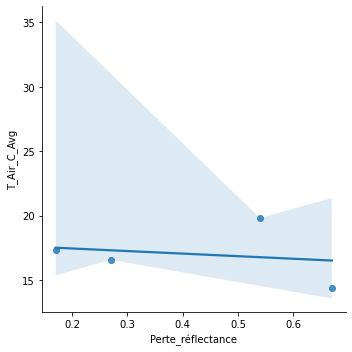

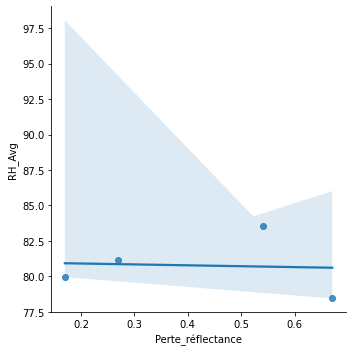

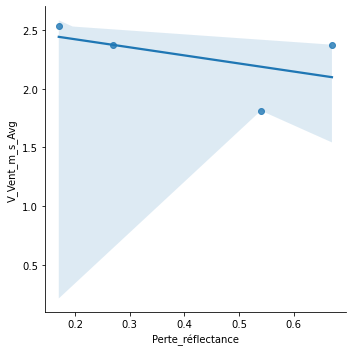

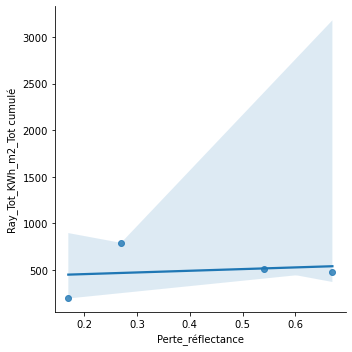

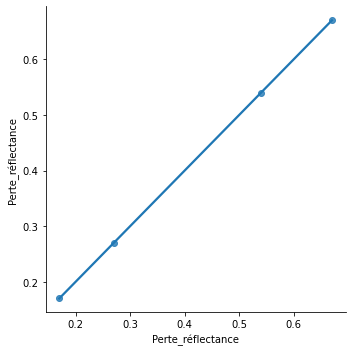

In [34]:
for i in list(df.columns):
    sns.lmplot(y=i, x='Perte_réflectance', data=df)

In [35]:
X= df.drop("Perte_réflectance", axis=1)
y = df["Perte_réflectance"]
X

,T_Air_C_Avg,RH_Avg,V_Vent_m_s_Avg,Ray_Tot_KWh_m2_Tot cumulé
0,16.557253,81.155198,2.376314,791.690513
1,19.803349,83.536651,1.813995,508.389976
2,14.407118,78.435152,2.376743,483.220425
3,17.306905,79.941144,2.539811,195.059701


# Linear model 

In [36]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [37]:
y_predict=linear_reg.predict(X)

In [40]:
erreur  = np.sqrt(mean_squared_error(y, y_predict))
erreur

9.63171463957453e-15

# model de Random Forest 


In [50]:

random_forest_reg = RandomForestRegressor(random_state=0)
model=RandomForestRegressor()
model.fit(X.values, y.values)


RandomForestRegressor()

In [51]:
y_pred = model.predict(X)

C:\Users\Abdel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [52]:
error = np.sqrt(mean_squared_error(y, y_pred))
print(error)

0.10427140068110702


In [53]:
score=model.score(X,y_predict)
score

C:\Users\Abdel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


0.7310029379928737

In [54]:
x=np.array([[20,20,30,200]])
y_predict=model.predict(x)
y_predict

array([0.3732])

In [55]:
data = {"model": model, "error": error , "score": score}
with open('finalized_model_temara.pkl', 'wb') as file:
    pickle.dump(data, file)

In [56]:
with open('finalized_model_ouarzazate.pkl', 'rb') as file:
    data = pickle.load(file)
rp=model
y_pred = rp.predict(x)
y_pred

array([0.3732])